In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [6]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
data.shape

(205, 26)

In [11]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Converting string into Integers

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem'])
data['doornumber']=labelencoder.fit_transform(data['doornumber'])
data['enginetype']=labelencoder.fit_transform(data['enginetype'])
data['cylindernumber']=labelencoder.fit_transform(data['cylindernumber'])

In [14]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,1,0,1,3,1,0,99.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,0,0,3,1,0,105.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,1,0,0,4,1,0,105.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,1,1,0,3,1,0,105.8,...,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,1,1,2,0,0,99.5,...,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [16]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
data.drop(columns="CarName", inplace=True)
data.drop(columns="car_ID", inplace=True)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
x = (data.loc[:, data.columns != 'price'])
y = (data.loc[:, data.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [26]:
network = Sequential()
network.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(x_train.shape[1],)))
network.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
network.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
network.add(layers.Dense(1))

In [27]:
network.compile(optimizer='rmsprop', loss='mse', metrics='mae')

In [30]:
history = network.fit(x_train,y_train, batch_size=16, verbose=0, epochs=200)

In [32]:
epochs = range(1, 201)

In [35]:
train_mae = history.history['mae']
#val_mae = history.history['val_mae']

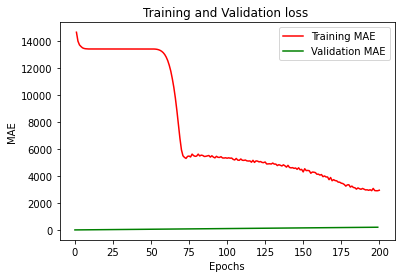

In [37]:
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [38]:
y_test

,price
15,30760.000
9,17859.167
100,9549.000
132,11850.000
68,28248.000
...,...
56,11845.000
128,37028.000
76,5389.000
144,9233.000


In [39]:
network.predict(x_test)

array([[20821.244 ],
       [17683.56  ],
       [10286.582 ],
       [13731.08  ],
       [26245.76  ],
       [ 7397.979 ],
       [10528.77  ],
       [ 9055.789 ],
       [11551.609 ],
       [ 9508.678 ],
       [13491.603 ],
       [ 9621.616 ],
       [14854.664 ],
       [13537.965 ],
       [30141.125 ],
       [ 7710.593 ],
       [ 3251.9763],
       [16954.941 ],
       [11595.508 ],
       [10529.607 ],
       [11989.267 ],
       [19235.746 ],
       [ 7276.554 ],
       [ 5349.0537],
       [ 6701.9194],
       [22135.918 ],
       [14060.977 ],
       [16959.95  ],
       [ 7442.44  ],
       [15909.854 ],
       [24213.785 ],
       [ 6567.319 ],
       [10160.092 ],
       [17439.855 ],
       [ 8367.647 ],
       [24067.203 ],
       [13220.032 ],
       [ 9064.95  ],
       [ 6204.4224],
       [17765.95  ],
       [10695.927 ],
       [15677.7295],
       [17771.168 ],
       [ 9952.2   ],
       [ 7025.1606],
       [ 8717.782 ],
       [ 6567.32  ],
       [10036

In [40]:
test_mse_score, test_mae_score  =network.evaluate(x_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 22717296.0000 - mae: 2962.1533
